# Is it possible to forecast on uniform discrete process?
- If you have any clue / tips / suggestion please contact me.

In [2]:
space = [i for i in range(37)]

In [22]:
import numpy as np
import pandas as pd

In [14]:
import matplotlib.pyplot as plt

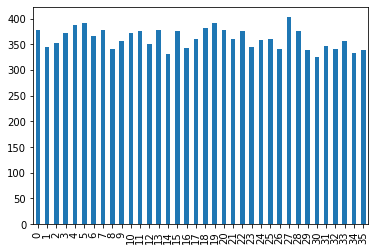

In [101]:
draws = pd.Series(np.random.randint(0, 36, 13_000))
draws.value_counts().sort_index().plot(kind="bar")

17.303333333333335


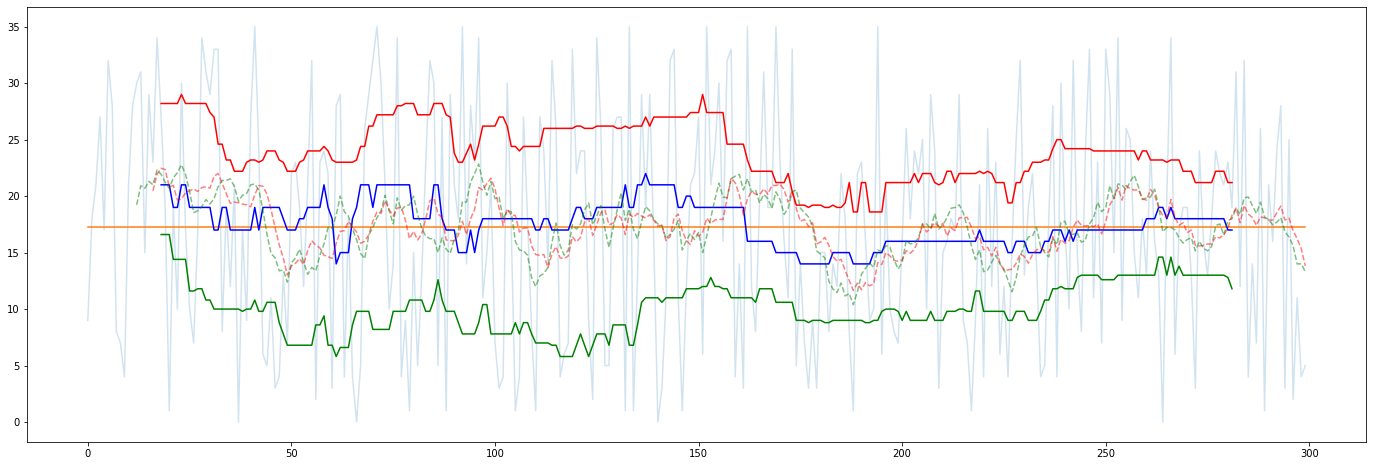

In [102]:
first_n = 300

mean = draws[:first_n].mean()
print(mean)

plt.subplots(figsize=(24, 8))
plt.plot(draws[:first_n], alpha=0.2)
plt.plot([mean]*first_n)

plt.plot(draws[:first_n].rolling(37, center=True).quantile(0.5), "b-")
plt.plot(draws[:first_n].rolling(37, center=True).quantile(0.3), "g-")
plt.plot(draws[:first_n].rolling(37, center=True).quantile(0.7), "r-")

plt.plot(draws[:first_n].rolling(13).mean(), "g--", alpha=0.5)
plt.plot(draws[:first_n].rolling(17).mean(), "r--", alpha=0.5)

16.996666666666666


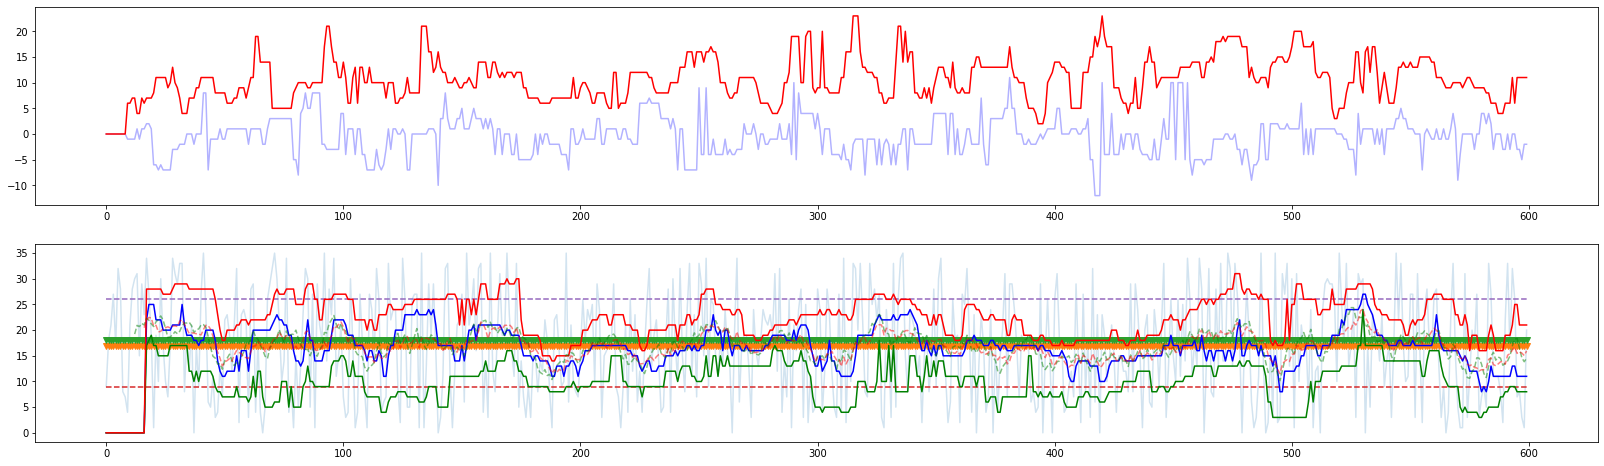

In [104]:
first_n = 600
center = False
mean = draws[:first_n].mean()
print(mean)

fig, ax = plt.subplots(2, 1, figsize=(28, 8))
plt.plot(draws[:first_n], alpha=0.2)

plt.plot([17]*first_n,"v-")
plt.plot([18]*first_n,"v-")
plt.plot([9]*first_n,"--")
plt.plot([26]*first_n,"--")

plt.plot(draws[:first_n].rolling(37//2, center=center).quantile(0.5).fillna(0).astype("i"), "b-")
plt.plot(draws[:first_n].rolling(37//2, center=center).quantile(0.3).fillna(0).astype("i"), "g-")
plt.plot(draws[:first_n].rolling(37//2, center=center).quantile(0.7).fillna(0).astype("i"), "r-")

plt.plot(draws[:first_n].rolling(13).mean(), "g--", alpha=0.5)
plt.plot(draws[:first_n].rolling(17).mean(), "r--", alpha=0.5)

ax_i = ax[0]
ax_i.plot(draws[:first_n].diff().rolling(37//4, center=center).quantile(0.5).fillna(0).astype("i"), "b-", alpha=0.3)
ax_i.plot(np.abs(draws[:first_n].diff().abs().rolling(37//4, center=center).quantile(0.5).fillna(0).astype("i")), "r-")


In [85]:
draws[:first_n].rolling(37//2, center=center).quantile(0.3).fillna(0).astype("i").median()

9.0

# some real life data

In [68]:
import io

In [107]:
input_txt="""
2	7	11-JUN-2020 12:57:35 AM
2	7	11-JUN-2020 12:57:35 AM
3	7	11-JUN-2020 12:56:35 AM
4	18	11-JUN-2020 12:55:35 AM
5	16	11-JUN-2020 12:54:35 AM
6	17	11-JUN-2020 12:53:35 AM
7	26	11-JUN-2020 12:52:35 AM
8	10	11-JUN-2020 12:51:35 AM
9	9	11-JUN-2020 12:50:35 AM
10	9	11-JUN-2020 12:49:35 AM
11	10	11-JUN-2020 12:48:35 AM
12	35	11-JUN-2020 12:47:35 AM
13	5	11-JUN-2020 12:46:35 AM
14	27	11-JUN-2020 12:45:35 AM
15	2	11-JUN-2020 12:44:35 AM
16	23	11-JUN-2020 12:43:35 AM
17	26	11-JUN-2020 12:42:35 AM
18	29	11-JUN-2020 12:41:35 AM
19	2	11-JUN-2020 12:40:35 AM
20	12	11-JUN-2020 12:39:35 AM
21	5	11-JUN-2020 12:38:35 AM
22	15	11-JUN-2020 12:37:35 AM
23	25	11-JUN-2020 12:36:35 AM
24	27	11-JUN-2020 12:35:35 AM
25	1	11-JUN-2020 12:34:35 AM
26	1	11-JUN-2020 12:33:35 AM
27	35	11-JUN-2020 12:32:35 AM
28	33	11-JUN-2020 12:31:35 AM
29	32	11-JUN-2020 12:30:35 AM
30	14	11-JUN-2020 12:29:35 AM
31	35	11-JUN-2020 12:28:35 AM
32	8	11-JUN-2020 12:27:35 AM
33	6	11-JUN-2020 12:26:35 AM
34	27	11-JUN-2020 12:25:35 AM
35	14	11-JUN-2020 12:24:35 AM
36	30	11-JUN-2020 12:23:35 AM
37	18	11-JUN-2020 12:22:35 AM
38	22	11-JUN-2020 12:21:35 AM
39	31	11-JUN-2020 12:20:35 AM
40	19	11-JUN-2020 12:19:35 AM
41	21	11-JUN-2020 12:18:35 AM
42	22	11-JUN-2020 12:17:35 AM
43	7	11-JUN-2020 12:16:35 AM
44	5	11-JUN-2020 12:15:35 AM
45	14	11-JUN-2020 12:14:35 AM
46	25	11-JUN-2020 12:13:35 AM
47	36	11-JUN-2020 12:12:35 AM
48	9	11-JUN-2020 12:11:35 AM
49	22	11-JUN-2020 12:10:35 AM
50	29	11-JUN-2020 12:09:35 AM
51	10	11-JUN-2020 12:08:35 AM
52	21	11-JUN-2020 12:07:35 AM
53	36	11-JUN-2020 12:06:35 AM
54	00	11-JUN-2020 12:05:35 AM
55	23	11-JUN-2020 12:04:34 AM
56	35	11-JUN-2020 12:03:34 AM
57	22	11-JUN-2020 12:02:34 AM
58	13	11-JUN-2020 12:01:34 AM
59	27	11-JUN-2020 12:00:34 AM
"""

new_data = pd.read_table(filepath_or_buffer=io.StringIO(input_txt), header=None, sep='\s')[::-1].reset_index(drop=True)
print(new_data.shape)
new_data[:3]

(59, 5)


/home/minesh_1291/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:63: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


,0,1,2,3,4
0,59,27,11-JUN-2020,12:00:34,AM
1,58,13,11-JUN-2020,12:01:34,AM
2,57,22,11-JUN-2020,12:02:34,AM


18.16949152542373


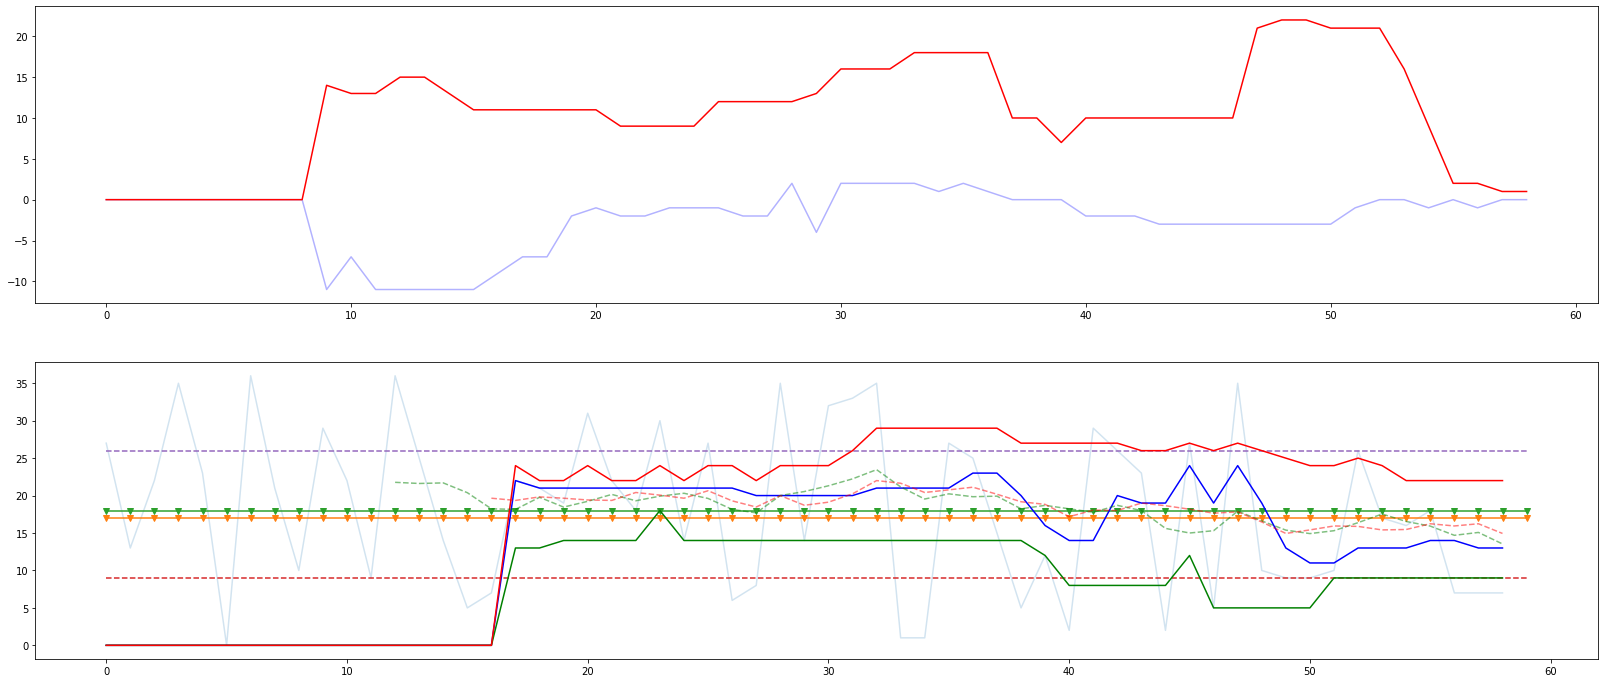

In [111]:
draws = new_data[1]
first_n = 60
center = False
mean = draws[:first_n].mean()
print(mean)

fig, ax = plt.subplots(2, 1, figsize=(28, 12))
plt.plot(draws[:first_n], alpha=0.2)

plt.plot([17]*first_n,"v-")
plt.plot([18]*first_n,"v-")
plt.plot([9]*first_n,"--")
plt.plot([26]*first_n,"--")

plt.plot(draws[:first_n].rolling(37//2, center=center).quantile(0.5).fillna(0).astype("i"), "b-")
plt.plot(draws[:first_n].rolling(37//2, center=center).quantile(0.3).fillna(0).astype("i"), "g-")
plt.plot(draws[:first_n].rolling(37//2, center=center).quantile(0.7).fillna(0).astype("i"), "r-")

plt.plot(draws[:first_n].rolling(13).mean(), "g--", alpha=0.5)
plt.plot(draws[:first_n].rolling(17).mean(), "r--", alpha=0.5)

ax_i = ax[0]
ax_i.plot(draws[:first_n].diff().rolling(37//4, center=center).quantile(0.5).fillna(0).astype("i"), "b-", alpha=0.3)
ax_i.plot(np.abs(draws[:first_n].diff().abs().rolling(37//4, center=center).quantile(0.5).fillna(0).astype("i")), "r-")